In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysolver as solver

# Damped Oscillation

In [2]:
def oscillator(t,y,K,M,L):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the input values
        :param K: the spring constant
        :param M: the mass of the oscillator
        :param L: the damping constant
        :param args: extra parameters, here args=(K,M,L) 

        """

        r          = L/2/M
        w0         = np.sqrt(K/M)
        yderive    = np.zeros(shape=y.shape)
        yderive[0] = y[1]
        yderive[1] = -2*r*y[1]-w0**2*y[0]

        return yderive

In [3]:
A = 1 # the initial amplitude
V = 0 # the initial velocity
K = 1 # the spring constant
M = 1 # the mass
L = 0.2 # the damping
N = 10000 # the time partion number
w0 = np.sqrt(K/M)
r  = L/2/M
if (w0**2-r**2) >= 0:
    w  = np.sqrt(w0**2-r**2)
else:
    w  = np.sqrt(r**2-w0**2)

t_span = (0, 20)
y0     = np.array([A,V])
t_eval = np.linspace(t_span[0], t_span[1], N)

In [4]:
sol_Euler = solver.solve_ivp(oscillator, t_span, y0, 
                             method='Euler', t_eval = t_eval, args = (K,M,L))

In [5]:
sol_RK2 = solver.solve_ivp(oscillator, t_span, y0, 
                           method='RK2', t_eval = t_eval, args = (K,M,L))

In [6]:
sol_RK4 = solver.solve_ivp(oscillator, t_span, y0, 
                           method='RK4', t_eval = t_eval, args = (K,M,L))

# Analytical Solution

In [7]:
# Calculate analytical solution here

t = np.linspace(t_span[0], t_span[1], 20)
phi = -np.pi/2
y_analytical = -A*np.exp(-r*t)*np.sin(w*t+phi)
v_analytical = -A*(-r*np.exp(-r*t)*np.sin(w*t+phi)+w*np.exp(-r*t)*np.cos(w*t+phi))

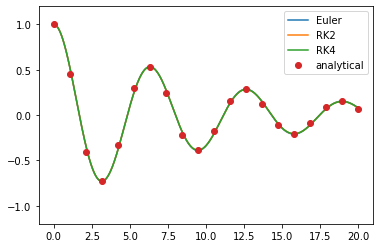

In [8]:
# Visualize your solution here

import matplotlib.pyplot as plt

plt.plot(t_eval, sol_Euler[0], label='Euler')
plt.plot(t_eval, sol_RK2[0], label='RK2')
plt.plot(t_eval, sol_RK4[0], label='RK4')
plt.plot(t, y_analytical, 'o', label='analytical')
plt.ylim(-1.2*A, 1.2*A)
plt.legend()

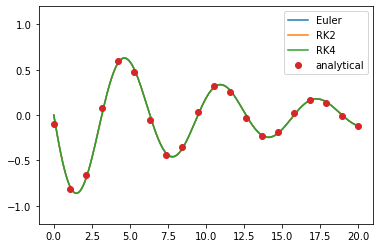

In [9]:
import matplotlib.pyplot as plt

plt.plot(t_eval, sol_Euler[1], label='Euler')
plt.plot(t_eval, sol_RK2[1], label='RK2')
plt.plot(t_eval, sol_RK4[1], label='RK4')
plt.plot(t, v_analytical, 'o', label='analytical')
plt.ylim(-1.2*A, 1.2*A)
plt.legend()

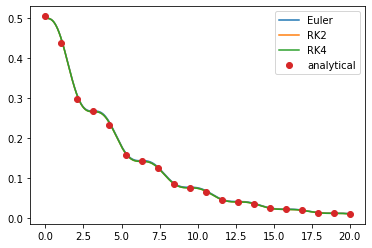

In [10]:
import matplotlib.pyplot as plt

Energy_Euler = 0.5*M*np.square(sol_Euler[1])+0.5*K*np.square(sol_Euler[0])
Energy_RK2   = 0.5*M*np.square(sol_RK2[1])+0.5*K*np.square(sol_RK2[0])
Energy_RK4   = 0.5*M*np.square(sol_RK4[1])+0.5*K*np.square(sol_RK4[0])
Energy_Analytical = 0.5*M*v_analytical**2 + 0.5*K*y_analytical**2

plt.plot(t_eval, Energy_Euler, label='Euler')
plt.plot(t_eval, Energy_RK2, label='RK2')
plt.plot(t_eval, Energy_RK4, label='RK4')
plt.plot(t, Energy_Analytical, 'o', label='analytical')

plt.legend()